In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [482]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [483]:
df.shape

(907, 27)

This dataset contains 27 features and 907 records

Let's check for nulls in the dataset.

In [484]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

From the above we can observe null values are present in the dataset. Let's fill those values.

From the above we can observe 'other_fuel3','generation_gwh_2013','estimated_generation_gwh','generation_gwh_2019' has only null values and does not contain data.
Let's drop these features.

In [485]:
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

From the above we can observe, other_fuel2 feature has data for only one record and remaining all records has null values. Let's drop this features also.

In [486]:
df.drop(columns=['other_fuel2','other_fuel3','generation_gwh_2013','estimated_generation_gwh','generation_gwh_2019','wepp_id' ],axis=1,inplace=True)

In [487]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [488]:
df['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [489]:
df['latitude'].mode()

0    19.0004
1    24.1917
Name: latitude, dtype: float64

In [490]:
df['latitude']=df['latitude'].fillna(df['latitude'].mode()[0])

In [491]:
df['longitude'].value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [492]:
df['longitude'].mode()

0    71.6917
Name: longitude, dtype: float64

In [493]:
df['longitude']=df['longitude'].fillna(df['longitude'].mode()[0])

In [494]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [495]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [496]:
df['other_fuel1'].mode()

0    Oil
Name: other_fuel1, dtype: object

In [497]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [498]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [499]:
df['commissioning_year'].mode()

0    2015.0
Name: commissioning_year, dtype: float64

In [500]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [501]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [502]:
df['owner']=df['owner'].fillna(df['owner'].mode()[0])

In [503]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [504]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [505]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [506]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

In [507]:
df['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [508]:
df['generation_gwh_2014'].mean()

2431.823590196344

In [509]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

In [510]:
df['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [511]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [512]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [513]:
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [514]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

All the null values are filled with appropriate values.

Let's check for dupliate records in the dataset.

In [515]:
df.duplicated().sum()

0

There are no duplicate records in the dataset.

Let's check statistical information of the data.

In [516]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,77.172109,2004.594267,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.098262,4.976401,15.734928,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,1998.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.493800,2014.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Below are the observations from the above information,

For features 'capacity_mw','generation_gwh_2014','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018' there is huge difference between 75% and max values. So, there can be outliers present in these features.

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

In [518]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2015.0,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2015.0,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


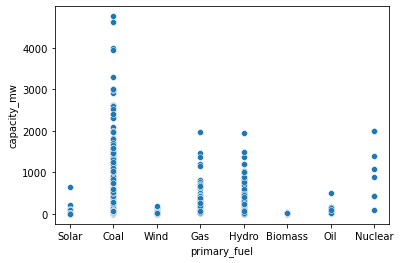

In [519]:
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

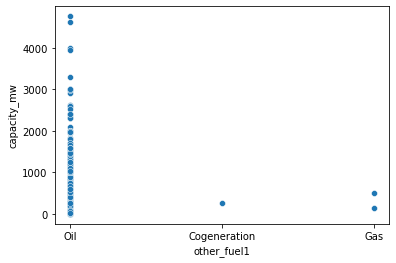

In [520]:
sns.scatterplot(x='other_fuel1',y='capacity_mw',data=df)
plt.show()

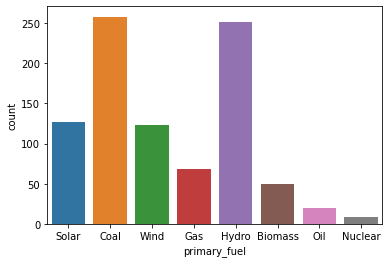

In [521]:
sns.countplot(x='primary_fuel',data=df)
plt.show()

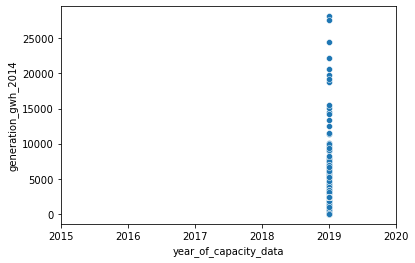

In [522]:
sns.scatterplot(x='year_of_capacity_data',y='generation_gwh_2014',data=df)
plt.xlim([2015,2020])
plt.show()

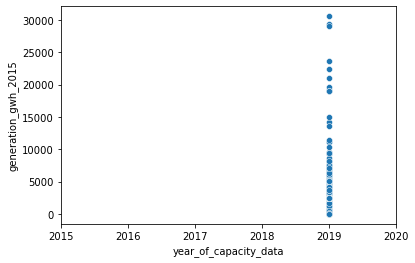

In [523]:
sns.scatterplot(x='year_of_capacity_data',y='generation_gwh_2015',data=df)
plt.xlim([2015,2020])
plt.show()

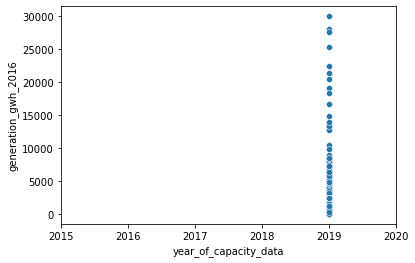

In [524]:
sns.scatterplot(x='year_of_capacity_data',y='generation_gwh_2016',data=df)
plt.xlim([2015,2020])
plt.show()

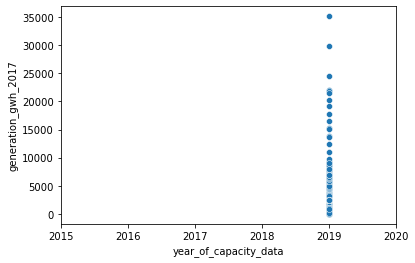

In [525]:
sns.scatterplot(x='year_of_capacity_data',y='generation_gwh_2017',data=df)
plt.xlim([2015,2020])
plt.show()

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

In [527]:
categorical_data=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        categorical_data.append(i)
        
categorical_data        

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [528]:
df['country'].unique()

array(['IND'], dtype=object)

In [529]:
df['country_long'].unique()
df.drop(columns='country',axis=1,inplace=True)

From the above we can observe country and country_long feature contains same data. Let's drop one features among these.

In [530]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [531]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [532]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [533]:
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [534]:
df['owner'].value_counts()

Acc Acc ltd                                                    569
Sterling Agro Industries ltd.                                    4
Jk Cement ltd                                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
Karnataka Power Corporation Limited                              3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 280, dtype: int64

In [535]:
df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [536]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [537]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [538]:
df['generation_data_source'].unique()

array(['Central Electricity Authority'], dtype=object)

Let's encode 'country_long','geolocation_source','generation_data_source','url','source','owner','other_fuel1','primary fuel' features with the help of encoding techniques.

In [539]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [540]:
cols=['country_long','geolocation_source','generation_data_source','url','source','owner','other_fuel1','primary_fuel']
for i in cols:
    df[i]=LE.fit_transform(df[i])
    
    

In [541]:
df['country_long'].unique()

array([0])

In [542]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [543]:
df['generation_data_source'].unique()

array([0])

In [544]:
df['url'].unique()

array([128, 173, 205,  58,  80,  48, 109, 146, 125, 121, 199, 112, 224,
       192, 100,  83,   1,  90,  85, 200, 234,  84, 172, 175,  17,  20,
       118, 161,  56, 153,   4,   2, 279,  86,  49,  46, 278, 154, 272,
       140,  81, 117,  34, 101, 267, 288, 198, 273, 292,  99, 284,  41,
        44, 103, 150,  42,  55,  82,  13, 108,  62,  24, 295, 203, 137,
       145,  21,  63,   3, 119,   9,  93, 170, 299, 133, 177, 193, 294,
       280,  38,  69,  47, 131, 126, 152, 228, 261, 197, 202, 277, 191,
       246,   6, 236, 102, 242,  76, 135, 183,  36, 138, 124,  26,  10,
       283, 296, 129, 149, 113, 155, 141,  31, 181, 208, 210, 290, 182,
       287,  68, 223, 207,  14,  22,  16,  92,  88,  89,  40, 244, 237,
       185, 190,  60,  95,  94,  25,  75, 174,  59,  79, 171,  97,  53,
       132, 169,  64, 254,  71, 127, 250, 240,  51, 105, 159,  43,  52,
       176, 151, 275, 184, 165, 289, 282, 186, 297, 252, 214, 164,  23,
       233, 139,  11, 225, 221,  98, 179, 303, 178, 106, 293, 10

In [545]:
df['source'].unique()

array([109, 174,  21,  22,  58,  36,  10, 148, 112,  97,  84,  67,  14,
        75,  65,  64, 172, 184,  62,  72, 106, 163, 179, 142,  17,  18,
        68,   6,   2, 144, 125,  61, 102,  85,  83,  26,   4,  88, 122,
         3,  19,  59,  54,  95,  29,  89, 157, 119, 134,  20,  31,  32,
       103, 151,  76, 146,  70, 110, 188, 173,  39,   9, 158,  23,  86,
        47, 117, 162, 121,  98, 129, 155,   8,  73, 126, 135,  38,  56,
        77,  46,  74, 164, 187,  24,  79, 190,  96,  43, 178, 160,  57,
       152,  82,  15, 115,  55,  33,  42,  12, 132, 145,  53,  40, 156,
         1, 175, 176,  69, 138,  63, 167,  87, 123,  25, 120,  90,  16,
        91,  92,  93,  94,   7, 136,  50, 116, 170, 168,  49, 133,  44,
       127, 171, 118, 131, 107, 113,  37,  60, 124,  41, 153,  52,  28,
       143, 177, 165,  48, 159, 111, 147,  11, 186, 169,  66, 161, 139,
       185, 140,  45,  81, 154, 181, 149, 141,  30, 150,  34, 105,   5,
       128,  99,  71,  13, 137,  80, 100,  27,  35, 104, 130, 11

In [546]:
df['owner'].unique()

array([229, 258,   2,   5,  89,  49,  14, 219,  53, 160, 132, 135,  41,
        52,  58, 117, 161, 209, 265, 100,  20, 108,  97,  24,  26,  96,
       256, 268,  93, 105, 152, 238, 262, 211,  25,  28, 101,  48,   3,
        54,  77, 170, 180,  92, 147,  66, 123, 126,   4,   6, 134, 191,
        30,  91,  84, 142,  40, 136,  35,  98,   8, 196,  31,  43,  44,
       149, 222, 110, 215, 103,  73, 275, 212, 257, 210,  13, 194, 125,
       231,  51,  61,  83,  34,  62, 129,  21,  74, 173, 236, 175, 158,
        72, 278, 218, 226,  32,  12, 228, 106, 181, 199,  90,  85,  57,
        95,  60,  87, 114,  70, 107, 239, 274,  55, 111,  36, 118, 277,
       143,  67, 260, 233,  88, 223, 122,  22, 167,  86,  45, 112,  65,
       113,  29, 237, 115,  17,  37, 213,  82,  59, 165, 241,   1, 259,
       273,  39, 183, 119, 249, 131, 124, 247, 130,  16,  56,  94, 214,
       127, 128, 137,  23, 138, 139, 140, 141,  11, 201, 109, 133,  79,
       172, 251, 144,  10, 162, 227,  76, 197,  68, 182, 252, 17

In [547]:
df['other_fuel1'].unique()

array([2, 0, 1])

In [548]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [549]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,2,2011.0,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,0,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,2,2015.0,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,0,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,2,2015.0,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,0,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,2,2004.0,5,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,2,2015.0,5,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [550]:
df.columns

Index(['country_long', 'name', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

Let's check data distribution

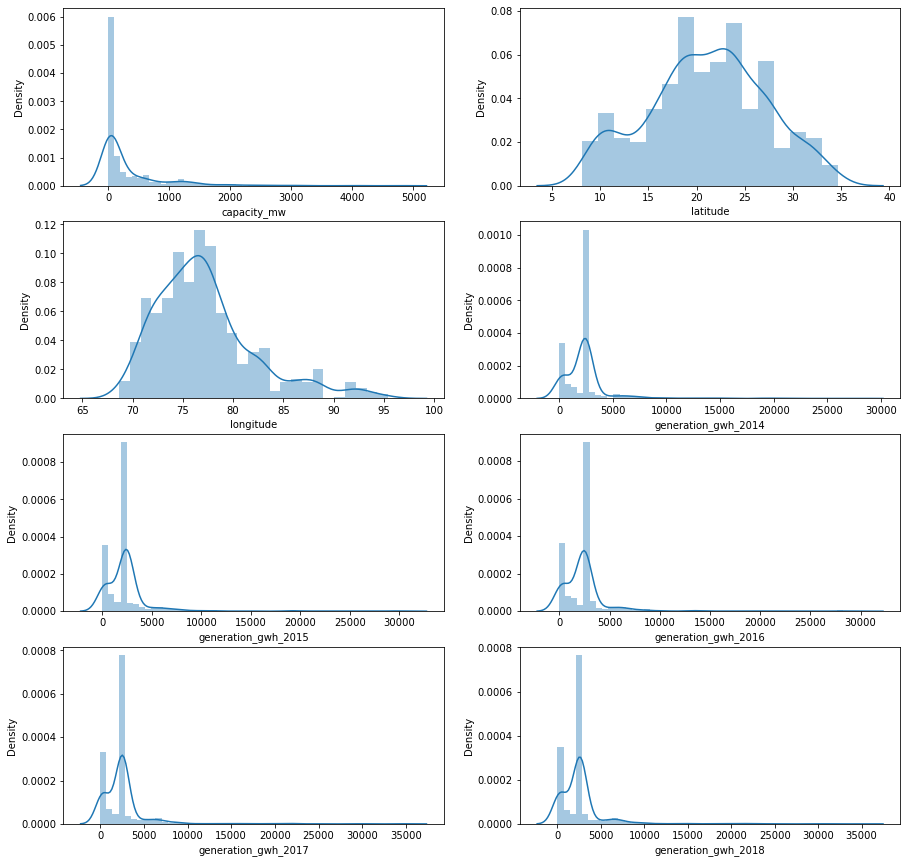

In [551]:
plt.figure(figsize=(15,15))
n=1
numerical_cols=['capacity_mw','latitude','longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

for i in numerical_cols:
    ax=plt.subplot(4,2,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

In [552]:
df[numerical_cols].skew()

capacity_mw            3.123576
latitude              -0.095721
longitude              1.130252
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

From the above we can observe, 'capacity_mw','longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018' has skewness values beyond normal range. Let's reduce skeweness using power transformation techniques.

In [553]:

df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['longitude']=np.log(df['longitude'])
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])
df['generation_gwh_2018']=np.cbrt(df['generation_gwh_2018'])
df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['longitude']=np.log(df['longitude'])
df[numerical_cols].skew()

capacity_mw            0.279151
latitude              -0.095721
longitude              0.892549
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.316915
dtype: float64

Let's check for outliers present in the dataset.

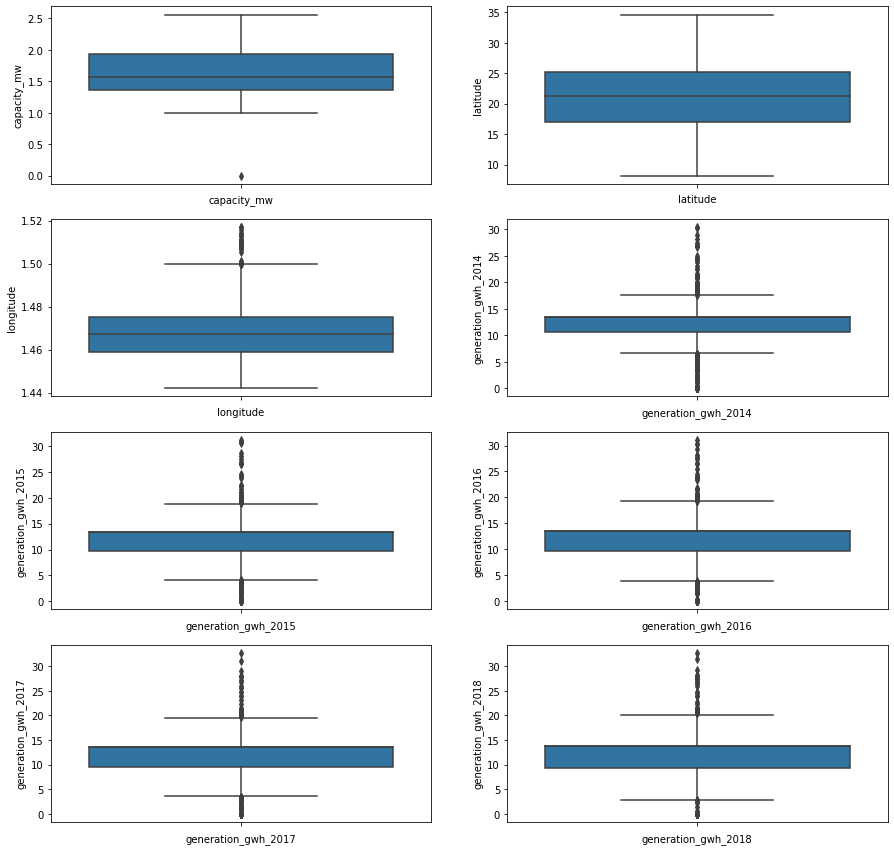

In [554]:
plt.figure(figsize=(15,15))
n=1
numerical_cols=['capacity_mw','latitude','longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

for i in numerical_cols:
    ax=plt.subplot(4,2,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
    
plt.show()    

From the above we can observe outliers are present in all numerical features except latitude. Let's remove outliers with the help of zscore technique.

In [555]:
from scipy.stats import zscore

cols=['capacity_mw','longitude','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

zscore=np.abs(zscore(df[cols]))
df1=df[(zscore<3).all(axis=1)]
df1.shape

(889, 20)

Let's check the correlation among features and labels.

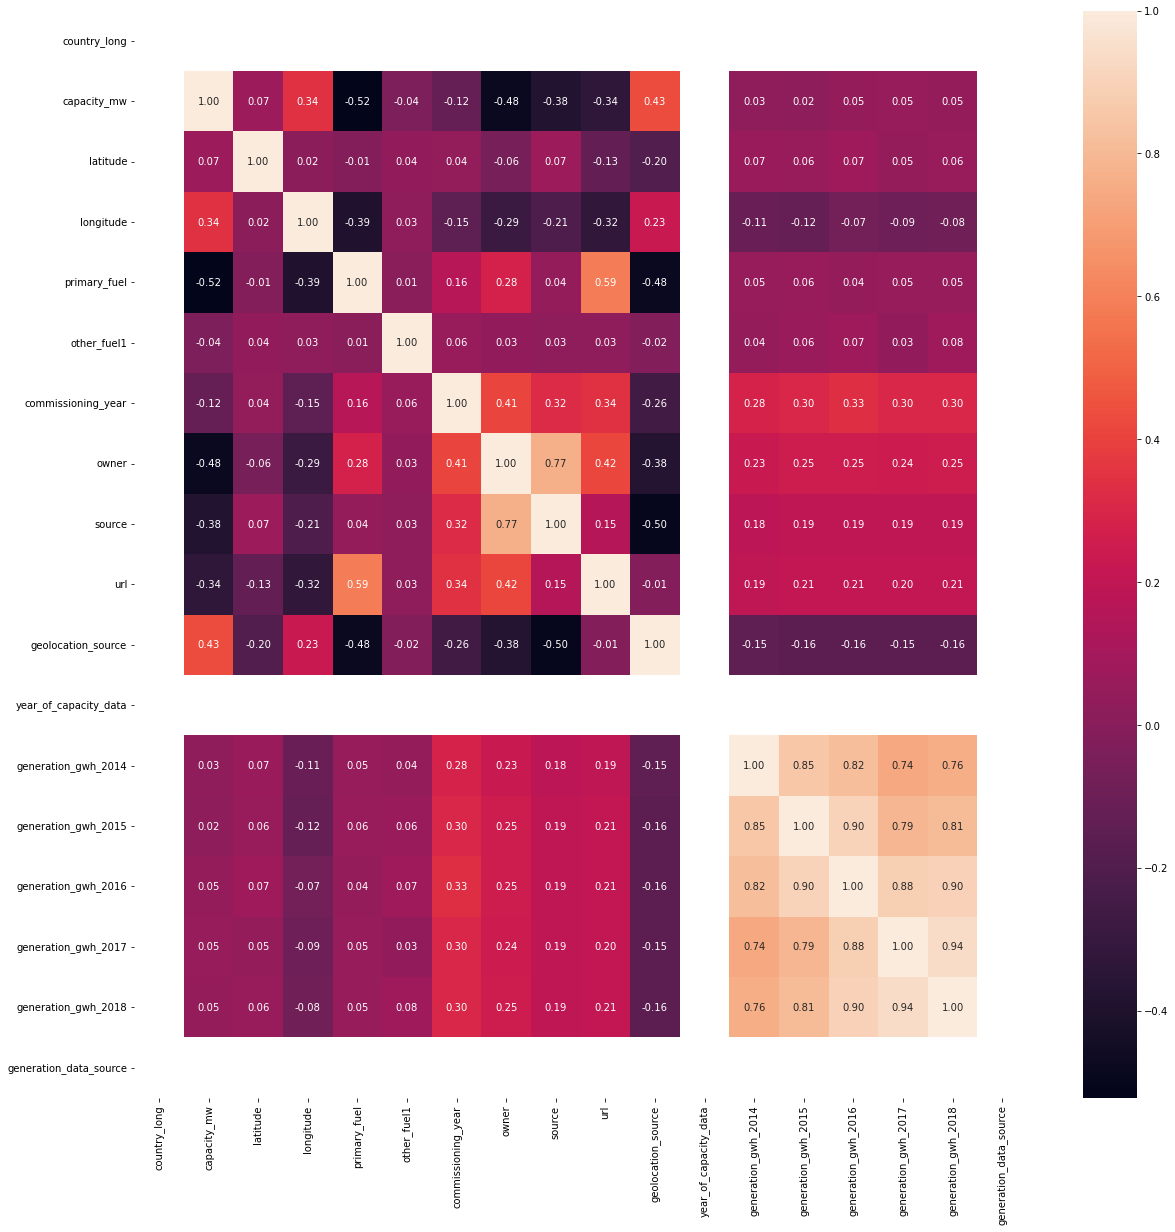

In [556]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

From the above we can observe 'year_of_capacity_data','generation_data_score','country_long' are highly correlated. Let's drop these features.

In [557]:
df1.drop(columns=['country_long','year_of_capacity_data','generation_data_source'],axis=1,inplace=True)


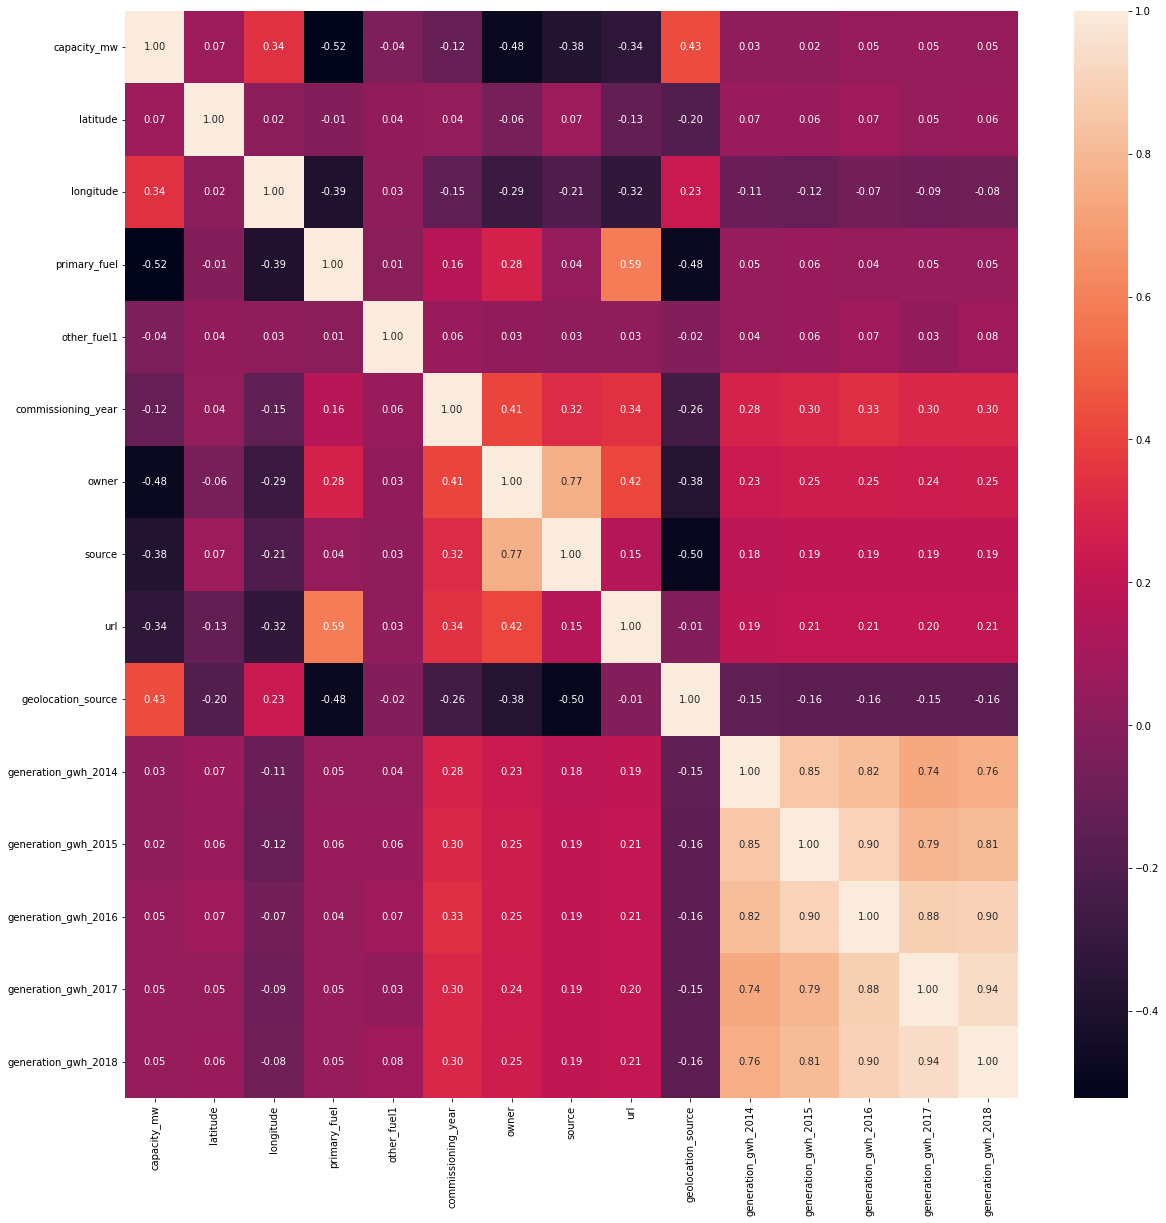

In [558]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

In [559]:
df1.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [560]:
df1.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,1.107173,28.1839,1.457161,6,2,2011.0,229,109,128,1,13.447576,13.440944,13.513816,13.657969,13.752106
1,ADITYA CEMENT WORKS,WRI1019881,1.664360,24.7663,1.461462,1,2,2015.0,258,174,173,2,13.447576,13.440944,13.513816,13.657969,13.752106
2,AES Saurashtra Windfarms,WRI1026669,1.503252,21.9038,1.444445,7,2,2015.0,2,21,205,2,13.447576,13.440944,13.513816,13.657969,13.752106
3,AGARTALA GT,IND0000001,1.724661,23.8712,1.507363,2,2,2004.0,5,22,58,2,8.516872,9.449397,9.604586,8.723154,8.555526
4,AKALTARA TPP,IND0000002,2.299836,21.9603,1.484259,1,2,2015.0,5,22,58,2,14.479241,18.086385,18.413278,17.528476,19.380155


As per my analysis, name,gppd_idnr features are not useful for predicting target let's drop these features.

In [561]:
df1.drop(columns=['name','gppd_idnr'],axis=1,inplace=True)

Let's check for multi collinearity problem in the dataset.

TASK-1 CLASSIFICATION(IDENTIFYING PRIMARY FUEL)

In [442]:
from sklearn.preprocessing import StandardScaler
x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [443]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [444]:
VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF

,features,value
0,capacity_mw,1.756397
1,latitude,1.104916
2,longitude,1.244779
3,other_fuel1,1.028935
4,commissioning_year,1.404073
5,owner,3.467016
6,source,2.973196
7,url,1.614579
8,geolocation_source,1.715369
9,generation_gwh_2014,3.896120


From the above we can observe  'generation_gwh_2018' has high vif value. Let's drop this feature.	

In [445]:
df1.drop('generation_gwh_2018',axis=1,inplace=True)
x.drop('generation_gwh_2018',axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)
VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF

,features,value
0,capacity_mw,1.755454
1,latitude,1.104908
2,longitude,1.244399
3,other_fuel1,1.016915
4,commissioning_year,1.403030
5,owner,3.466041
6,source,2.973195
7,url,1.613484
8,geolocation_source,1.714645
9,generation_gwh_2014,3.865752


Now, lets find the best random state and train the model.

In [446]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [447]:
max_acc=0
max_rand_state=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc_score=accuracy_score(y_test,y_predict)
    if(acc_score>max_acc):
        max_acc=acc_score
        max_rand_state=i
        
print("Best Random State - ",max_rand_state," Accuracy score - ",max_acc)        

Best Random State -  175  Accuracy score -  0.8913857677902621


Best Random state is 175.

In [448]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=175)

In [449]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [450]:
svc=SVC()
svc.fit(x_train,y_train)
y_predict_svc=svc.predict(x_test)
acc_score_svc=accuracy_score(y_test,y_predict_svc)
print("Accuracy score ",acc_score_svc)

Accuracy score  0.8277153558052435


In [451]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.8352059925093633


In [452]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print("Accuracy Score ",acc_score_Knn)

Accuracy Score  0.8127340823970037


In [453]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.5842696629213483


In [454]:
GDT=GradientBoostingClassifier()
GDT.fit(x_train,y_train)
y_predict_GDT=GDT.predict(x_test)
acc_score_GDT=accuracy_score(y_test,y_predict_GDT)
print("Accuracy Score ",acc_score_GDT)

Accuracy Score  0.8764044943820225


In [455]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.8651685393258427


In [456]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("accuracy score :",acc_score_RFC)

accuracy score : 0.8913857677902621


In [457]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy Score ",acc_score_ETC)

Accuracy Score  0.8838951310861424


In [458]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy score - ",acc_score_LR)

Accuracy score -  0.8052434456928839


From the above we can observe RandomForestClassifier exhibits highest accuracy score of 89%. 

Let's check whether accuracy score provided by the model is due to overfitting of the model. 

In [459]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [460]:
score=cross_val_score(RFC,x,y)
mean=score.mean()
print("Difference is ",acc_score_RFC-mean)

Difference is  0.045470703992890216


In [461]:
score=cross_val_score(svc,x,y)
mean=score.mean()
print("Difference is ",acc_score_svc-mean)

Difference is  0.3586427981971688


In [462]:
score=cross_val_score(Knn,x,y)
mean=score.mean()
print("Difference is ",acc_score_Knn-mean)

Difference is  0.1490509744175712


In [463]:
score=cross_val_score(DTC,x,y)
mean=score.mean()
print("Difference is ",acc_score_DTC-mean)

Difference is  0.01631435282168492


In [464]:
score=cross_val_score(ETC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ETC-mean)

Difference is  0.036888211769186774


In [465]:
score=cross_val_score(GDT,x,y)
mean=score.mean()
print("Difference is ",acc_score_GDT-mean)

Difference is  0.03049577858185759


In [466]:
score=cross_val_score(ABC,x,y)
mean=score.mean()
print("Difference is ",acc_score_ABC-mean)

Difference is  0.1321081698724052


In [467]:
score=cross_val_score(BC,x,y)
mean=score.mean()
print("Difference is ",acc_score_BC-mean)

Difference is  0.027144036056624188


In [468]:
score=cross_val_score(LR,x,y)
print('Difference is ',acc_score_LR-score.mean())

Difference is  0.2428362851520346


From the above we can observe cross validation score provided by the DecisionTreeClassifier has less value. Let's consider this as the best model for the given dataset.

Let's generate classification report and confusion matrix.

In [469]:
print("confusion matrix \n",confusion_matrix(y_test,y_predict_DTC))
print("classification report \n",classification_report(y_test,y_predict_DTC))

confusion matrix 
 [[12  1  0  0  0  0  0  0]
 [ 0 59  6  3  2  2  0  0]
 [ 0  5  5  7  0  2  0  0]
 [ 0  5  7 60  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0 43]]
classification report 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.81      0.82      0.81        72
           2       0.28      0.26      0.27        19
           3       0.85      0.83      0.84        72
           4       0.00      0.00      0.00         3
           5       0.43      1.00      0.60         3
           6       1.00      0.98      0.99        42
           7       1.00      1.00      1.00        43

    accuracy                           0.84       267
   macro avg       0.67      0.73      0.68       267
weighted avg       0.84      0.84      0.83       267



Let's tune parameter and try to increase accuracy score of the model.

In [470]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],
           'min_samples_split':[5,6,7],
           'min_samples_leaf':[2,3,4],
           'max_depth':[14,15,16,17]}

In [471]:
GSV=GridSearchCV(DTC,param_grid=param_grid,n_jobs=-1)
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [472]:
Best_model=ExtraTreesClassifier(criterion='gini',max_depth=16,min_samples_leaf=2,min_samples_split=6)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc=accuracy_score(y_test,y_predict)
print("Accuracy score - ",acc)

Accuracy score -  0.8576779026217228


In [473]:
print("confusion_matrix\n",confusion_matrix(y_test,y_predict))

confusion_matrix
 [[10  2  0  0  0  0  0  1]
 [ 2 64  3  3  0  0  0  0]
 [ 1  3  2 12  0  0  0  1]
 [ 0  5  0 67  0  0  0  0]
 [ 0  1  1  0  0  0  0  1]
 [ 0  1  0  1  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 43]]


In [474]:
print("classification report \n",classification_report(y_test,y_predict))

classification report 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.84      0.89      0.86        72
           2       0.33      0.11      0.16        19
           3       0.81      0.93      0.86        72
           4       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00        42
           7       0.93      1.00      0.97        43

    accuracy                           0.86       267
   macro avg       0.71      0.63      0.64       267
weighted avg       0.83      0.86      0.83       267



In [475]:
import pickle
pickle.dump('Best_model',open("Poser_plant_classification","wb"))

TASK-2 REGRESSION (IDENTIFYING CAPACITY_MW) 

In [477]:
df1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

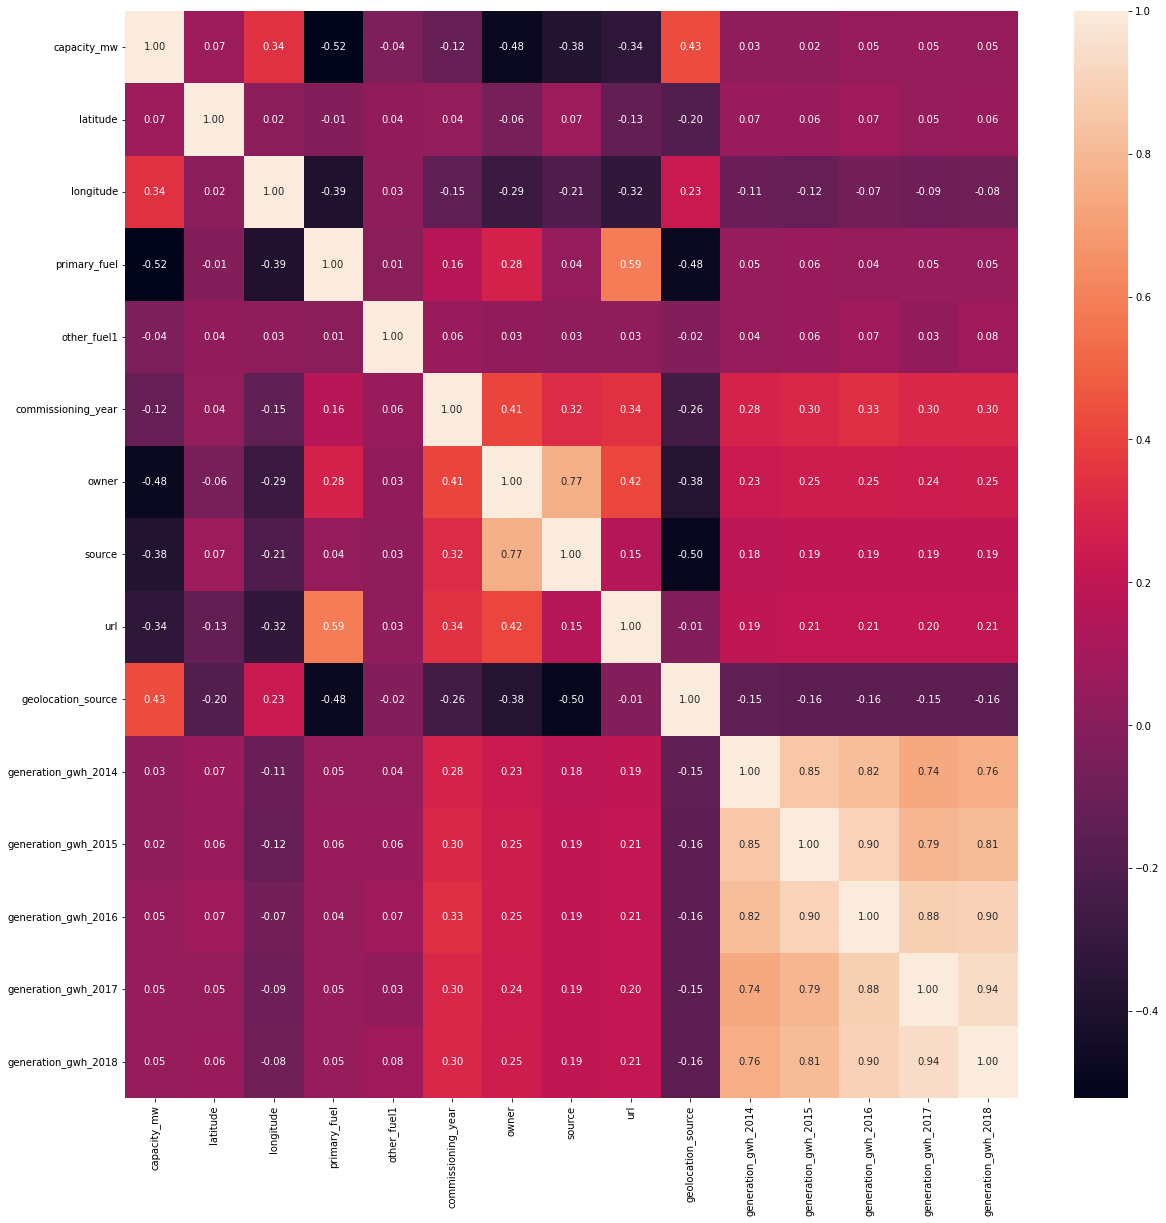

In [565]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

In [562]:
x=df1.drop('capacity_mw',axis=1)
y=df1['capacity_mw']
x_scaled=scaler.fit_transform(x)

In [564]:
VIF=pd.DataFrame()
VIF['features']=x.columns
VIF['value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
VIF

,features,value
0,latitude,1.096504
1,longitude,1.267742
2,primary_fuel,3.674080
3,other_fuel1,1.026736
4,commissioning_year,1.422530
5,owner,3.423814
6,source,3.901038
7,url,2.821587
8,geolocation_source,3.115881
9,generation_gwh_2014,3.893316


As, per my analysis from heatmap and Vif value let's drop generation_gwh_2018 feature.

In [566]:
x.drop('generation_gwh_2018',axis=1,inplace=True)
x_scaled=scaler.fit_transform(x)

Let's find best Random State.

In [569]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [570]:
max_rvalue=0
max_randstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    y_predict=LR.predict(x_test)
    r_value=r2_score(y_test,y_predict)
    if(r_value>max_rvalue):
        max_rvalue=r_value
        max_randstate=i
        
    
print('Best random state : ',max_randstate) 
print('r2 score :',max_rvalue)

Best random state :  107
r2 score : 0.5337635418421407


Best Random state is 107.

In [572]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=107)

In [573]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [574]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
r_value_LR=r2_score(y_test,y_predict_LR)
print("R2 score - ",r_value_LR)

R2 score -  0.5337635418421407


In [575]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
y_predict_DTR=DTR.predict(x_test)
r_value_DTR=r2_score(y_test,y_predict_DTR)
print("R2 score - ",r_value_DTR)

R2 score -  0.7079070526091509


In [576]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
y_predict_KNR=KNR.predict(x_test)
r_value_KNR=r2_score(y_test,y_predict_KNR)
print('R2 score - ',r_value_KNR)

R2 score -  0.6532534364601907


In [577]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
y_predict_RFR=RFR.predict(x_test)
r_value_RFR=r2_score(y_test,y_predict_RFR)
print('R2 score - ',r_value_RFR)

R2 score -  0.8277098218128454


In [578]:
L=Lasso()
L.fit(x_train,y_train)
y_predict_L=L.predict(x_test)
r_value_L=r2_score(y_test,y_predict_L)
print('R2 score - ',r_value_L)

R2 score -  -0.0018145207670874353


In [579]:
R=Ridge()
R.fit(x_train,y_train)
y_predict_R=R.predict(x_test)
r_value_R=r2_score(y_test,y_predict_R)
print('R2 score - ',r_value_R)

R2 score -  0.5338607771753318


From the above we can observe, RandomForestRegressor has highest r2score. 

Let's check r2 score provided by the model is due to overfitting of the model.

In [580]:
from sklearn.model_selection import cross_val_score

In [581]:
score=cross_val_score(LR,x,y)
print("Difference is ",r_value_LR-score.mean())

Difference is  0.09157652440517006


In [582]:
score=cross_val_score(DTR,x,y)
print("Difference is ",r_value_DTR-score.mean())

Difference is  0.04577924055493576


In [583]:
score=cross_val_score(KNR,x,y)
print("Difference is ",r_value_KNR-score.mean())

Difference is  0.035882841258723985


In [584]:
score=cross_val_score(L,x,y)
print("Difference is ",r_value_L-score.mean())

Difference is  -0.2474834539500163


In [585]:
score=cross_val_score(R,x,y)
print("Difference is ",r_value_R-score.mean())

Difference is  0.09538287271953655


In [586]:
score=cross_val_score(RFR,x,y)
print("Difference is ",r_value_RFR-score.mean())

Difference is  0.018673232006824247


From the above we can observe cross validation score provided by RandomForestReressor model is less. Let's consider this model as best model for this dataset.

Let's generate MAE,MSE values.

In [587]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict_RFR))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict_RFR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict_RFR)))

Mean Absolute Error  0.10542102666714198
Mean Squared Error  0.021880253321623022
Root mean squared error  0.14791975297986074


Let's tune the parameters.

In [589]:
from sklearn.model_selection import GridSearchCV

In [590]:
param={'max_depth':[16,17,18,19],'min_samples_leaf':[2,3,4],'min_samples_split':[4,5,6,7]}

In [591]:
GSCV=GridSearchCV(RFR,param_grid=param,n_jobs=-1)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [595]:
Best_model=RandomForestRegressor(max_depth=18,min_samples_leaf=2,min_samples_split=5)
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
r_value=r2_score(y_test,y_predict)
print("R2 score - ",r_value)

R2 score -  0.8313908585647827


In [596]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error ",mean_absolute_error(y_test,y_predict))
print("Mean Squared Error ",mean_squared_error(y_test,y_predict))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,y_predict)))

Mean Absolute Error  0.10627560818454077
Mean Squared Error  0.02141277445854411
Root mean squared error  0.1463310440697534


In [597]:
import pickle
pickle.dump('Best_model',open('Power_plant_Regression','wb'))